# Titanic Project:

Submitted by **POOJA C** Batch no:1831.

**STATEMENT: The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.** 


**Dataset Description:**
- Passenger ID : It is the unique id given to each passenger from 1-891.
- Survived : 0-Dead, 1-Survived.
- Pclass : Ticket class ,1st class-1, 2nd class-2, 3rd class-3.
- Name : Name of the Passenger.
- Sex : Sex of the passenger(male, female or third gender).
- SibSp : Number of siblings or spouses.
- Parch : Number of parents / children aboard the titanic.
- Ticket : Ticket number.
- Fare : Passenger Fare.
- Cabin : Cabin number.
- Embarked : Port of Embarkation:- C-Cherbourg, Q-Queenstown, S-Southampton

# Importing data:

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Titanic project.csv") #reading the csv file
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


By looking into my titanic data set and reading the problem statement i can say that survived is my target column and my target column data is classifaction(integer) type, So i can conclude that my titanic project is a **Classification problem**. 

# EDA:

In [3]:
#Checking shape of dataset
df.shape

(891, 12)

My data set contains 891 rows and 12 columns.

In [4]:
#reading all column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

I got all column names of my dataset.

In [5]:
#Checking data types of each feature
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Look here i got PassengerID, Survived, Pclass, SibSp, Parch as integer type data, Name, Sex, Ticket, Cabin, Embarked as object type data and Age, Fare as float type data.

In [6]:
#Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


I can notice that in column **Age**, **Cabin** and column **Embarked** there are null values.So i have to handle them in future steps.

In [7]:
#Checking unique values in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Above are the list of unique count in each column.

In [8]:
#Checking the number of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I can see 177 null values in Age column, 687 null values in Cabin column and 2 null values in Embarked column.

In [9]:
#Checking unique values in target column
df['Survived'].unique()

array([0, 1], dtype=int64)

In my target column i have only two unique values as 0-Dead and 1-Survived.

In [10]:
#Checking for any empty observation in target column
df.loc[df['Survived'] == " "]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


I can notice there is no empty observation in my target column.

In [11]:
#Checking for value count of target column
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

So the value counts of unique element in target is as above, they look imbalanced.I have to balance them.

In [12]:
#describing the data set
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I can see the statistics of my data set and some columns are missing since they are object type data i have to encode them.
Some observations:
- 1.There are a total of 891 passengers in our dataset.
- 2.There are very less mean value for the survived ,it means very less people survived.
- 3.The mean of age are around 30,it means maxm middle age people were travelling.
- 4.For age minm value is 0.42,it means some infants were also travelling (of few months).
- 5.We also notice that age contains some missing values.

# Visualization:

# Univariate Analysis:

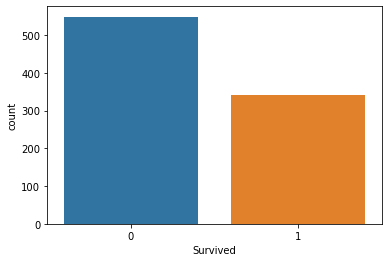

In [13]:
#Count plot for target
sns.countplot(df['Survived']);

I can notice a data imbalancing in my target.I can balance either using oversampling or under sampling.Since i may loose data in undersampling so it is prefered to use oversampling.

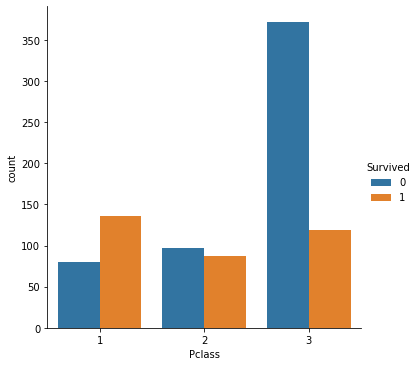

In [14]:
#Factor plot for pclass
sns.factorplot('Pclass',kind='count',data=df,hue='Survived') 

I can see the people in class 3 has less survilence and more death, in class 2 bith death and survilence are almost same, and in class 1 survilence is more than death.

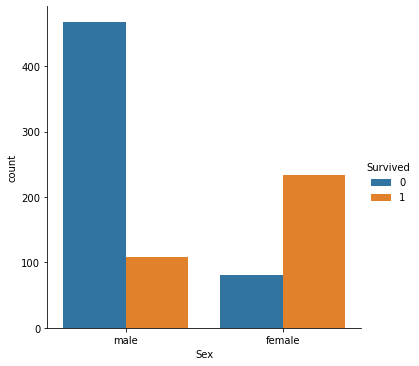

In [15]:
#Factor plot for sex
sns.factorplot('Sex',kind='count',data=df,hue='Survived')

The count of death is more in male and less in female, while the count of survival is more in female than in male.

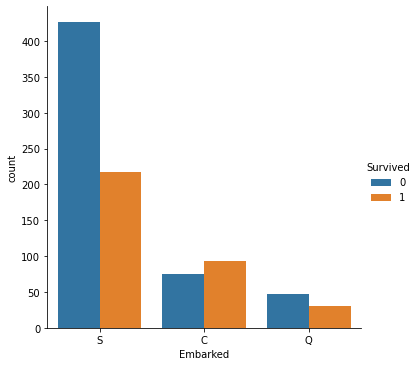

In [16]:
#Factoplot for Embarked
sns.factorplot('Embarked',kind='count',data=df,hue='Survived')

The count of death is more in people who embarked at port C,and less in other two ports.

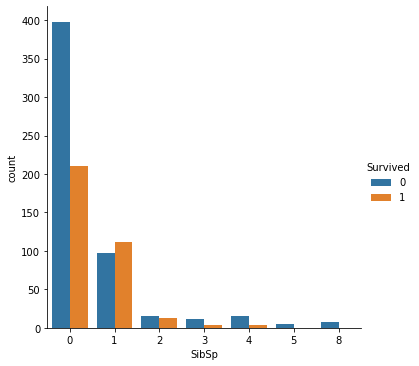

In [17]:
#Factor plot for SibSp
sns.factorplot('SibSp',kind='count',data=df,hue='Survived')

Death is more in people with 0 SibSP, and less with 8 SibSp.

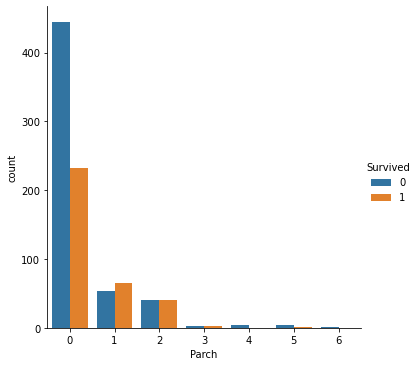

In [18]:
#Factor plot for SibSp
sns.factorplot('Parch',kind='count',data=df,hue='Survived')

People travelling with 0 Parch has death rate more that people travelling with 6 Parch.

<AxesSubplot:xlabel='Age', ylabel='Density'>

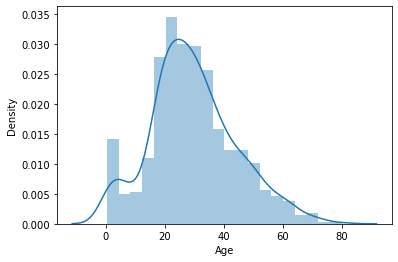

In [19]:
#distplot for age
sns.distplot(df['Age'])

It looks age is almost normally distributed.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

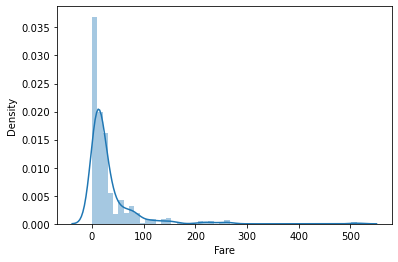

In [20]:
#distplot for fare
sns.distplot(df['Fare'])

Fare is skewed.

# Bivariate analysis:

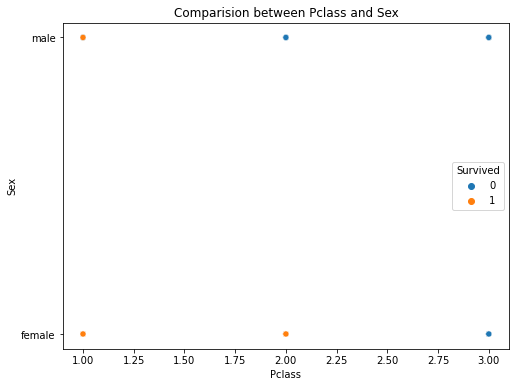

In [21]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(df['Pclass'],df['Sex'],hue=df["Survived"]);

I can notice that male and female in 1st class are survived, female in class 2 are survived but male are dead, and both male and female are dead in 3rd class.
- This gives a outlook that rich people who has selected costliest class are alive that means safty was good with luxurious class, and people who were poor had no safty.

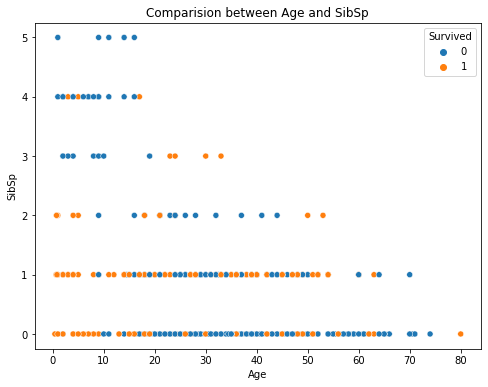

In [22]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and SibSp')
sns.scatterplot(df['Age'],df['SibSp'],hue=df["Survived"]);

It looks like a mixture of deaths and survilance.People with 0-20 age and 5 sibsp are all dead and people with 0 sibsp are mixture of deaths and survived.

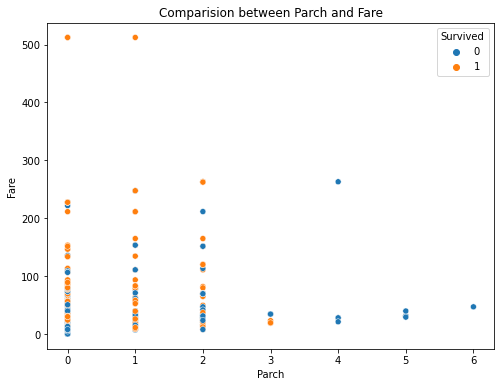

In [23]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Parch and Fare')
sns.scatterplot(df['Parch'],df['Fare'],hue=df["Survived"]);

People above 4 parch are all dead.And people with 0-2 parch are mixtures of survilance and fare is upto 300.

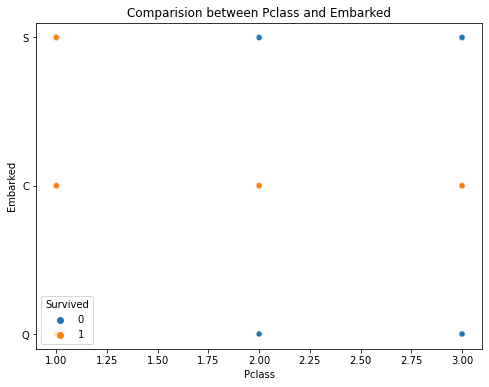

In [24]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Pclass and Embarked')
sns.scatterplot(df['Pclass'],df['Embarked'],hue=df["Survived"]);

People 1st class are all alive irrespective of port they embarked, 2nd and 3rd class people embarked from S,Q port are survived than C port.

# Multivariate Analysis:

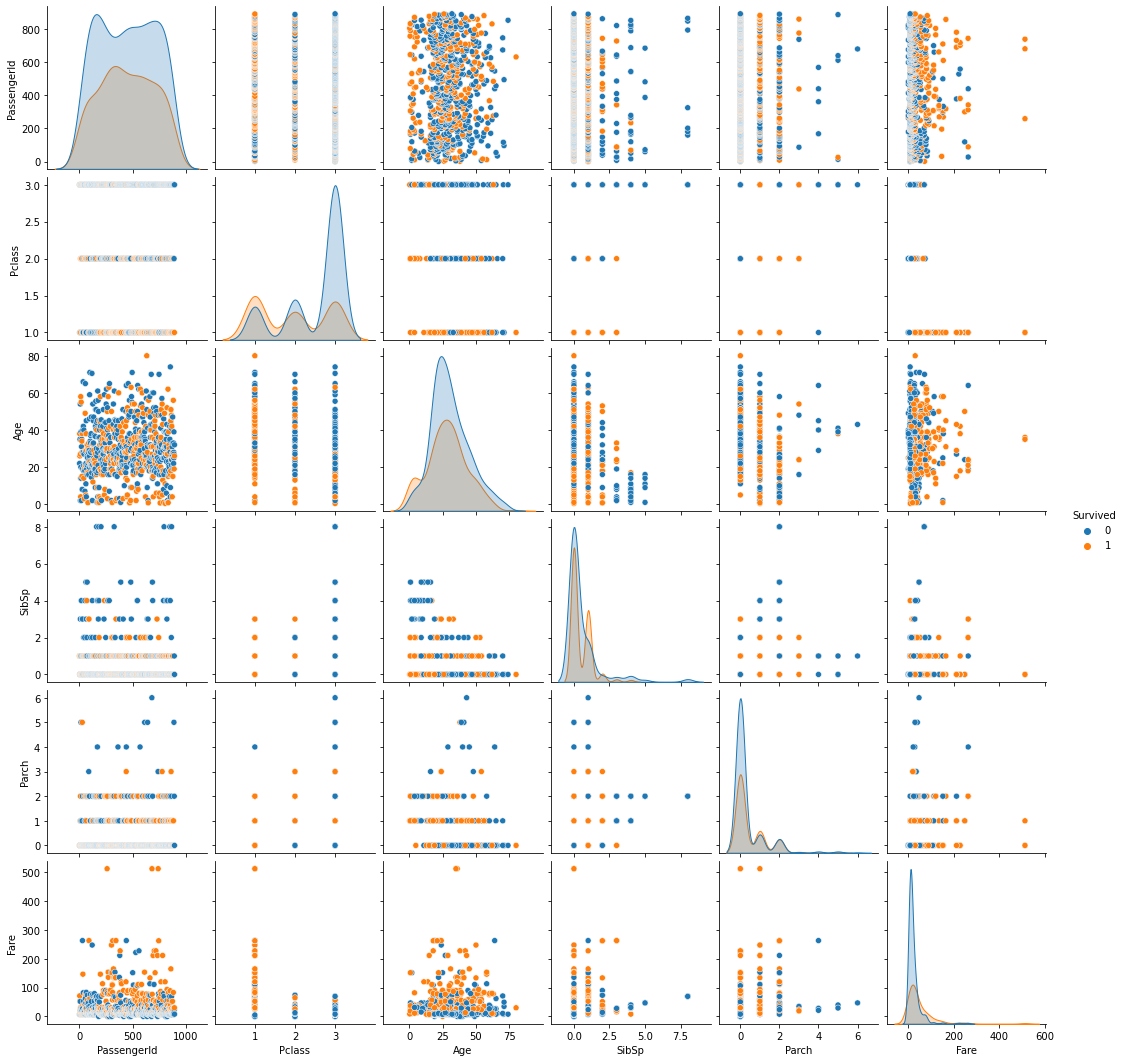

In [25]:
#pair ploting for df
sns.pairplot(df,hue="Survived")

 I can notice death rate is more in all paired plots.Which means the survilance rate is very less in this accident.

# Label Encoding:

In [26]:
#Encoding all categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Name','Sex','Ticket','Cabin','Embarked']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

Using Label encoding i have encoded all categorical columns.

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


This is my data set after encoding.

# Identifying the outliers:

I have continuous data only in Age and Fare column.So i need to check outliers only in 2 columns.

<AxesSubplot:xlabel='Age'>

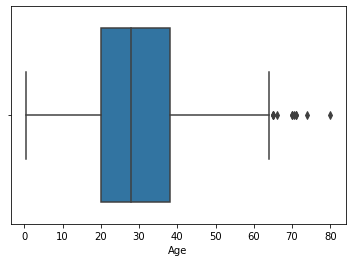

In [28]:
#plotting box plot for Age column
sns.boxplot(df["Age"])

Yes there are outliers in Age column.

<AxesSubplot:xlabel='Fare'>

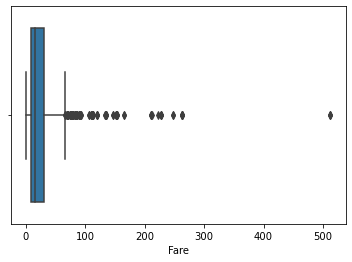

In [29]:
#plotting box plot for Age column
sns.boxplot(df["Fare"])

In Fare column also i can find the outliers.

**All other columns with outliers i.e., outliers in categorical columns has no meaning.And also no need to remove them.**

# Treating the null values:

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

I have to remove null values in Age column.

In [31]:
#Treating null values in Age column using median
df["Age"]=df["Age"].fillna(df["Age"].median())

Since in Age column i was able to recognise outliers so i have used median for treating null values.

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


This is my data set after removing null values.

In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now i can notice there are no null values in my dataset.

# Removing outliers:

In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Got all column names.

# i) Zscore method:

In [35]:
dfContCols = df[["Age", "Fare"]]

Making a variable as dfContCols and listing all columns with outliers.

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(dfContCols))
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


Using Zscore i have removed the outliers.

In [37]:
#Checking shape of new dataset
df_new.shape

(864, 12)

In my new dataset after removing outliers i have 864 rows and 12 columns.

In [38]:
#Checking shape of old dataset
df.shape

(891, 12)

In my old dataset i have 891 rows and 12 columns.

In [39]:
#Checking dataloss in Zscore
Dataloss=(((891-864)/891)*100)
Dataloss

3.0303030303030303

I have 3.03% dataloss which is less than 10% in zscore method.Let me have a look into IQR method also.

# ii) IQR method:

In [40]:
Q1=dfContCols.quantile(0.25)
Q3=dfContCols.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Using IQR i have removed the outliers.

In [41]:
#Checking shape of new dataset
df_1.shape

(721, 12)

In my new data set after removing outliers using IQR i have 721 rows and 12 columns.

In [42]:
#Checking shape of old dataset
df.shape

(891, 12)

In my old dataset i have 891 rows and 12 columns.

In [43]:
#Checking dataloss in IQR method
Dataloss=(((891-721)/891)*100)
Dataloss

19.07968574635241

I can observe a great dataloss in IQR method, So let me stick on to Zscore method to remove outliers.

# Checking for Skewness:

In [44]:
df_new.skew()

PassengerId    0.011620
Survived       0.502011
Pclass        -0.708375
Name          -0.014382
Sex           -0.632203
Age            0.321096
SibSp          3.751753
Parch          2.840412
Ticket         0.012485
Fare           2.257178
Cabin         -2.387542
Embarked      -1.308754
dtype: float64

I can say there is skewness in
- Pclass
- Sex
- SibSp
- Parch
- Fare
- Cabin
- Embarked

# Removing skewness using yeo-johnson:

In [45]:
fea=['Pclass','Sex','SibSp','Parch','Fare','Cabin','Embarked']

Taking a list as fea with all the columns with skewness.

In [46]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removed the skewness.

In [47]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [48]:
df_new.skew()

PassengerId    0.011620
Survived       0.502011
Pclass        -0.480433
Name          -0.014382
Sex           -0.632203
Age            0.321096
SibSp          0.805038
Parch          1.277888
Ticket         0.012485
Fare          -0.009095
Cabin         -1.718018
Embarked      -0.860511
dtype: float64

The skewness is reduced somehow.

# Correlation matrix with heat map:

In [49]:
cor=df_new.corr()

Checking correlations.

In [50]:
cor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.014399,-0.029821,-0.043518,0.047309,0.026087,-0.053324,0.009120,-0.064635,-0.017867,-0.023780,0.015772
Survived,-0.014399,1.000000,-0.334725,-0.053716,-0.534012,-0.058724,0.103005,0.141854,-0.175168,0.322012,-0.293749,-0.139426
Pclass,-0.029821,-0.334725,1.000000,0.039166,0.129101,-0.335783,-0.060038,-0.001549,0.359153,-0.601053,0.680540,0.043525
Name,-0.043518,-0.053716,0.039166,1.000000,0.020680,0.073091,-0.091281,-0.045219,0.058393,-0.039313,0.027914,-0.009725
Sex,0.047309,-0.534012,0.129101,0.020680,1.000000,0.065600,-0.198531,-0.249661,0.061305,-0.262301,0.118111,0.099158
Age,0.026087,-0.058724,-0.335783,0.073091,0.065600,1.000000,-0.157487,-0.270779,-0.097952,0.110097,-0.268494,0.013958
SibSp,-0.053324,0.103005,-0.060038,-0.091281,-0.198531,-0.157487,1.000000,0.436627,0.012016,0.432721,-0.046945,-0.011289
Parch,0.009120,0.141854,-0.001549,-0.045219,-0.249661,-0.270779,0.436627,1.000000,0.003003,0.354063,-0.009421,0.022641
Ticket,-0.064635,-0.175168,0.359153,0.058393,0.061305,-0.097952,0.012016,0.003003,1.000000,-0.153268,0.278092,0.009390
Fare,-0.017867,0.322012,-0.601053,-0.039313,-0.262301,0.110097,0.432721,0.354063,-0.153268,1.000000,-0.537948,-0.103396


I got all correlations of features with other features.Let me visualize it using heat map.

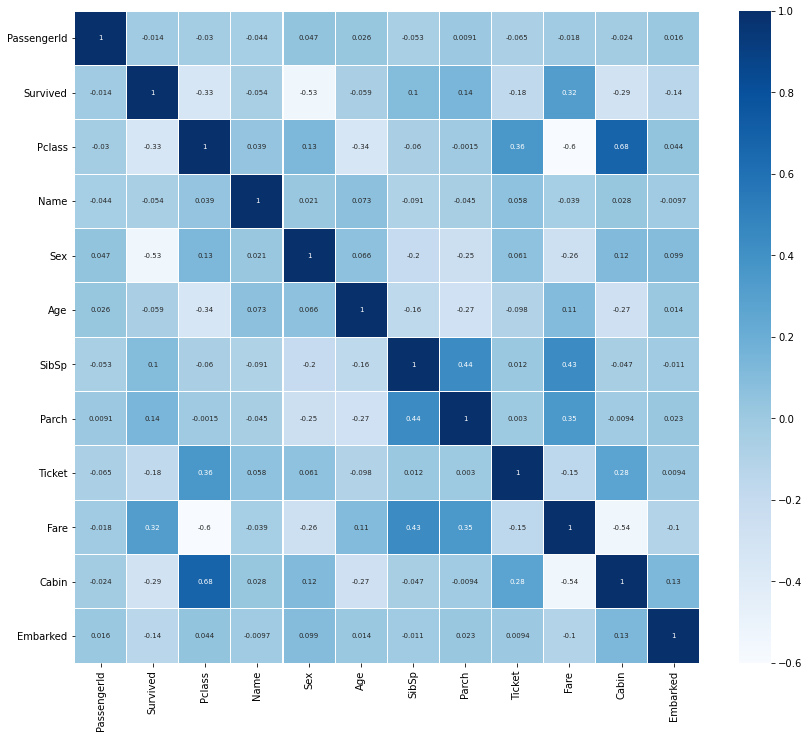

In [51]:
plt.figure(figsize=(14,12))
sns.heatmap(df_new.corr(),linewidths=.1,cmap="Blues",annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

I got the observation from heat map that 
- Passenger ID has less correlation with target variable.
- Name has less correlation with target variable.
- Age has less correlation with target variable.
- SibSp has less correlation with target variable.
- Embarked has less correlation with target variable.
- There is no multicorrelation issue.

If necessary i can remove very less correlated feature with target.

# Visualizing correlation of target variable using bar plot:

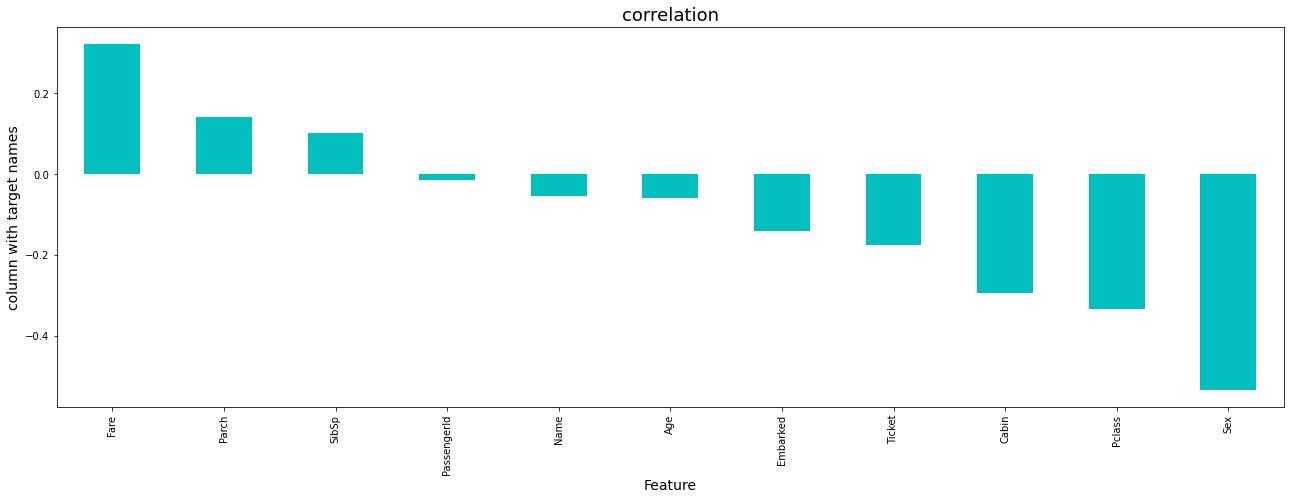

In [52]:
plt.figure(figsize=(22,7))
df_new.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

PassengerID is the very least correlated feature with target variable.

In [53]:
#Droping PassengerId column since it is less correlated with target variable.
df_new = df_new.drop(["PassengerId"],axis=1)

In [54]:
#Droping Name column since it is less correlated with target variable.
df_new = df_new.drop(["Name"],axis=1)

In [55]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0.842705,0.733053,22.0,1.374574,-0.548637,523,-0.882769,0.482558,0.573241
1,1,-1.501903,-1.364158,38.0,1.374574,-0.548637,596,1.529038,-2.211931,-1.801839
2,1,0.842705,-1.364158,26.0,-0.680931,-0.548637,669,-0.792444,0.482558,0.573241
3,1,-1.501903,-1.364158,35.0,1.374574,-0.548637,49,1.216581,-2.358732,0.573241
4,0,0.842705,0.733053,35.0,-0.680931,-0.548637,472,-0.776493,0.482558,0.573241
...,...,...,...,...,...,...,...,...,...,...
886,0,-0.676050,0.733053,27.0,-0.680931,-0.548637,101,-0.279691,0.482558,0.573241
887,1,-1.501903,-1.364158,19.0,-0.680931,-0.548637,14,0.607981,-2.385902,0.573241
888,0,0.842705,-1.364158,28.0,1.374574,1.879004,675,0.345275,0.482558,0.573241
889,1,-1.501903,0.733053,26.0,-0.680931,-0.548637,8,0.607981,-2.344305,-1.801839


This is my present data set on which i have to perform preprocessing.

# Preprocessing:

In [56]:
x = df_new.drop("Survived",axis=1)
y = df_new["Survived"]

Assigned y as target variable and x as remaining features.

# Scaling data using MinMaxScaler:

In [57]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [58]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

It is the coding for scaling data using MinMaxScaler.

In [59]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.000000,1.0,0.329064,0.83479,0.000000,0.769118,0.432617,1.000000,0.376728
1,0.000000,0.0,0.573041,0.83479,0.000000,0.876471,0.848336,0.061227,0.000000
2,1.000000,0.0,0.390058,0.00000,0.000000,0.983824,0.448186,1.000000,0.376728
3,0.000000,0.0,0.527295,0.83479,0.000000,0.072059,0.794478,0.010081,0.376728
4,1.000000,1.0,0.527295,0.00000,0.000000,0.694118,0.450936,1.000000,0.376728
...,...,...,...,...,...,...,...,...,...
859,0.352235,1.0,0.405306,0.00000,0.000000,0.148529,0.536569,1.000000,0.376728
860,0.000000,0.0,0.283318,0.00000,0.000000,0.020588,0.689575,0.000615,0.376728
861,1.000000,0.0,0.420555,0.83479,0.990972,0.992647,0.644293,1.000000,0.376728
862,0.000000,1.0,0.390058,0.00000,0.000000,0.011765,0.689575,0.015107,0.000000


These are my dependent variables after scalerization.

In [60]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

Since my target data is imbalanced i have to balance it using oversampling.

# Balancing target column using oversampling:

In [61]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y=SM.fit_resample(x, y)

Did oversampling using SMOTE.

In [62]:
y.value_counts()

1    537
0    537
Name: Survived, dtype: int64

So now my data looks beautifully **balanced**.

# Finding Best random state and accuracy:

In [63]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8513931888544891  on Random_state  6


Got best accuracy and random state.

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Created train and test data.

# Classification Algorithms:

In [65]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# i) Logistic Regression:

In [66]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       162
           1       0.82      0.82      0.82       161

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



Logistic Regression is giving me 82% accuracy.

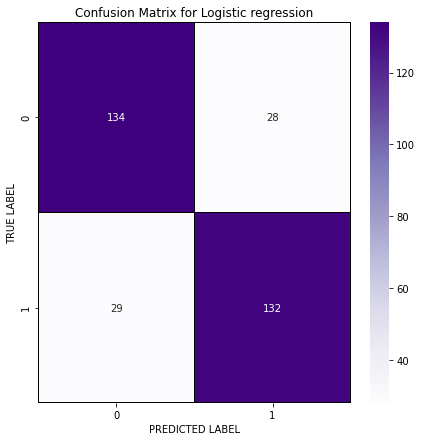

In [67]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic regression')
plt.show()

We can see the true values and predicted values in Logistic Regression model using confusion matrix.

# ii) Decision Tree Classifier:

In [68]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       162
           1       0.83      0.89      0.86       161

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Decision tree classifier is giving me 85% accuracy.

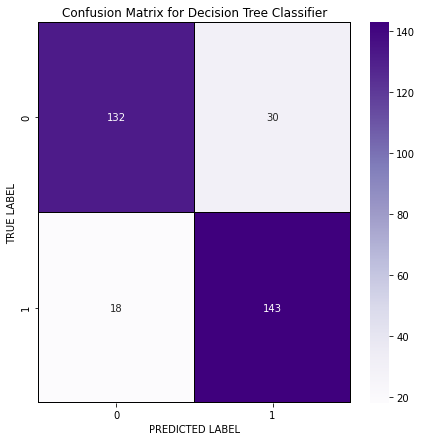

In [69]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

# iii) Random Forest Classifier:

In [70]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       162
           1       0.85      0.90      0.88       161

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



Random Forest Classifier is giving me 87% accuracy.

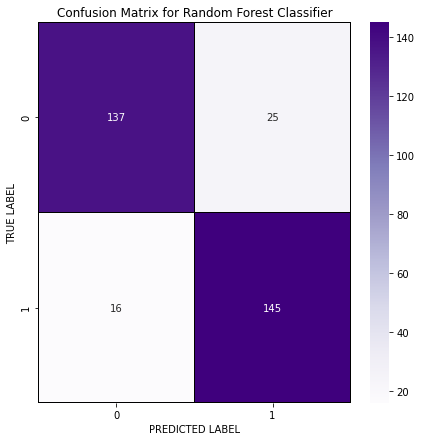

In [71]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

# iv) Support Vector Classifier:

In [72]:
SV=SVC()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       162
           1       0.86      0.80      0.83       161

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323



Support Vector Classifier is giving me 84% accuracy.

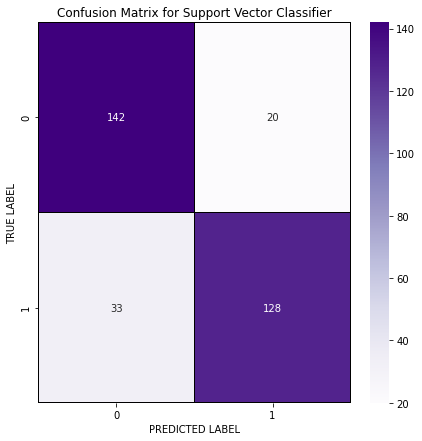

In [73]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

We can see the true values and predicted values in Support Vector Classifier model using confusion matrix.

# v) K-Neighbor Classifier:

In [74]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       162
           1       0.84      0.85      0.84       161

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323



K-Neighbor Classifier is giving me 84% accuracy.

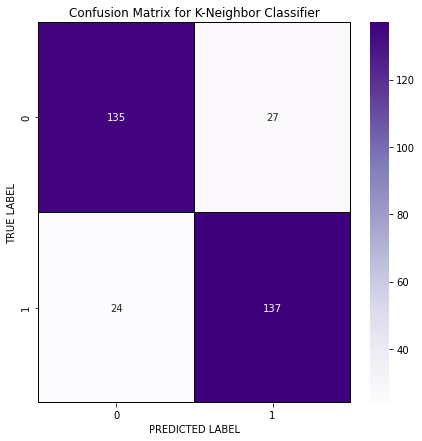

In [75]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

We can see the true values and predicted values in K-Neighbor Classifier model using confusion matrix.

# Cross Validation:

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.7811997391871333


In [78]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8166311671375788


In [79]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8510584655509671


In [80]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.802629863073245


In [81]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.8035774831558357


Above are the cross validation score of LR, DTC, RFC, SVC and KNN.

By looking into the difference of accuracy of the model and its cross validation score. I found that RFC as best model with less difference.

# Hyper parameter tuning:

In [82]:
#importing necessary library
from sklearn.model_selection import GridSearchCV

In [83]:
parameter = {'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30]}

Giving the parameters list for Random Forest Classifier model.

In [84]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

Running grid search CV for RFC.

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30]})

Training the model.

In [93]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 29,
 'max_features': 'auto',
 'max_leaf_nodes': 30}

Got the best parameters for RFC.

In [95]:
Final_mod=RandomForestClassifier(criterion='entropy',max_depth=29,max_features='auto',max_leaf_nodes=30)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

87.92569659442725


After tuning RFC i got 87.92% accuracy which is good.

# ROC-AUC Curve:

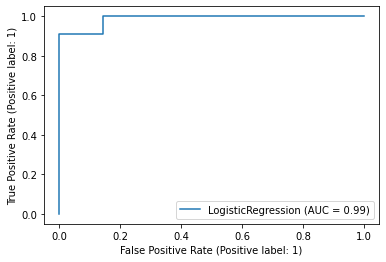

In [96]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = LogisticRegression(random_state=134)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the roc curve for Logistic Regression model with AUC=0.99.

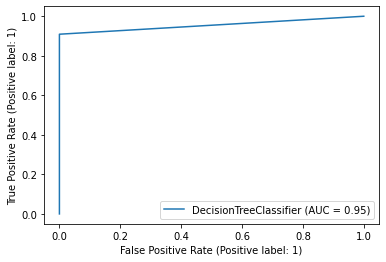

In [97]:
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = DecisionTreeClassifier(random_state=134)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the roc curve for DecisionTreeClassifier model with AUC=0.95.

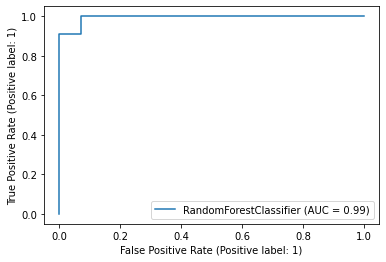

In [98]:
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = RandomForestClassifier(random_state=134)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the roc curve for RandomForestClassifier model with AUC=0.99.

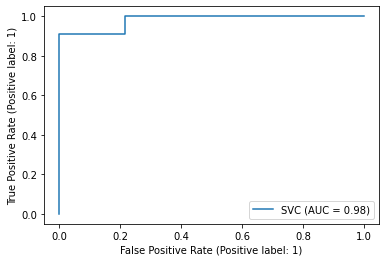

In [99]:
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = SVC(random_state=134)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the roc curve for Support Vector Classifier model with AUC=0.98.

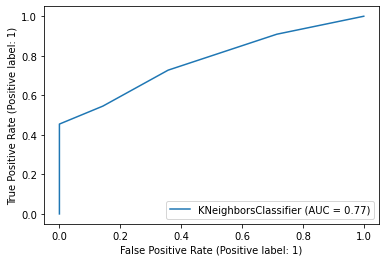

In [104]:
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = KNN()
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the roc curve for K-Neighbor Classifier model with AUC=0.77.

# Saving the model:

In [105]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Titanic.pkl")

['Titanic.pkl']

# Done: